# Davis Franklin

## Research question/interests

**I would like to further investigate Apple's market capitalization by specifically looking at the effect that the release of a new iPhone has on Apple's market value. I would like to analyze weather the market responds positively or negatively to the release of each iPhone and how much the stock value is impacted.** From this, I hope to determine which iPhone had the largest positive impact and which iPhone had the largest negative impact on Apple's stock value.

I am interested in tech and specifically, apple products, and would like to see what iPhones were most beneficial to apple's market capitalization and which ones were not. I am going to answer this research question by using an additional dataset that includes every iPhone. This dataset will then allow me to obtain the specific date each iPhone was released, and with this imformation I can analyze the dataset of Apple's stock price and observed the characteristics of the stock value during these times. After the initial EDA it is apparent that there is a relationship between Apple's stock value and the invention of the iPhone; therefore, the goal is to further analyze this relationship.

## Imports:

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.dates import YearLocator, DateFormatter
import seaborn as sns
import calendar
import datetime

sns.set_theme(style="ticks", font_scale=1)
import matplotlib.pyplot as plt
plt.rc("axes.spines", top=False, right=False)

### Loading Data:

In [83]:
stocks_df = pd.read_csv("../data/raw/AAPL_stock.csv")
iPhone_df = pd.read_csv("../data/raw/iPhones.csv")

## Data Understanding:

### For stocks_df:

In [84]:
stocks_df.shape

(10443, 7)

In [85]:
stocks_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [86]:
stocks_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [87]:
stocks_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10443.000000,10443.000000,10443.000000,10443.000000,10443.000000,1.044300e+04
mean,14.453559,14.611925,14.294785,14.458603,13.823986,3.314118e+08
std,31.337795,31.699692,30.979093,31.351249,31.046629,3.390498e+08
min,0.049665,0.049665,0.049107,0.049107,0.038329,0.000000e+00
25%,0.283482,0.289063,0.275893,0.282891,0.235214,1.241298e+08
50%,0.472321,0.481429,0.464286,0.473214,0.389186,2.188788e+08
75%,14.445892,14.601071,14.297321,14.463393,12.409363,4.116770e+08
max,182.630005,182.940002,179.119995,182.009995,181.511703,7.421641e+09


In [88]:
stocks_df.describe(exclude=np.number)

,Date
count,10443
unique,10443
top,1980-12-12
freq,1


### For iPhone_df:

In [89]:
iPhone_df.shape

(37, 2)

In [90]:
iPhone_df.head()

,iPhone,Release_Date
0,iPhone 1st Gen,2007-01-09
1,iPhone 3G,2008-05-09
2,iPhone 3Gs,2009-05-08
3,iPhone 4,2010-05-07
4,iPhone 4S,2011-10-04


In [91]:
iPhone_df.dtypes

iPhone          object
Release_Date    object
dtype: object

In [92]:
iPhone_df.describe(exclude=np.number, datetime_is_numeric=True)

,iPhone,Release_Date
count,37,37
unique,37,19
top,iPhone 1st Gen,2022-09-07
freq,1,4


In [93]:
first_iPhone = iPhone_df['Release_Date'].min()
print(f"The first iPhone was released in: {first_iPhone}")

The first iPhone was released in: 2007-01-09


## Data Preperation:

##### In this step I converted the 'Date' column to be in datetime format, I renamed the columns to all be labeled in a consistent format (first letter of each word capitalize and underscores for spaces), and I checked if there was any null values for both datasets. After this step the data with be consistent and cleaned.

### For stocks_df:

In [94]:
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])

In [95]:
stocks_df = stocks_df.rename(columns={'Adj Close': 'Adj_Close'})
stocks_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume'], dtype='object')

In [96]:
stocks_df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj_Close    0
Volume       0
dtype: int64

In [97]:
stocks_df['Change'] = stocks_df['Open'] - stocks_df['Close']

In [98]:
df_stocks.to_csv('../data/processed/APPL_processed_analysis1.csv')

### For iPhones_df:

In [99]:
iPhone_df['Release_Date'] = pd.to_datetime(iPhone_df['Release_Date'])

In [100]:
iPhone_df.columns

Index(['iPhone', 'Release_Date'], dtype='object')

In [101]:
iPhone_df.isna().sum()

iPhone          0
Release_Date    0
dtype: int64

In [102]:
df_iPhone.to_csv('../data/processed/iPhone_processed_analysis1.csv')

#### Merging df_iPhones and df_stocks to create one dataframe with all the imformation

In [103]:
merged_df = pd.merge(stocks_df, iPhone_df, left_on='Date', right_on='Release_Date')

## Data Visualization:

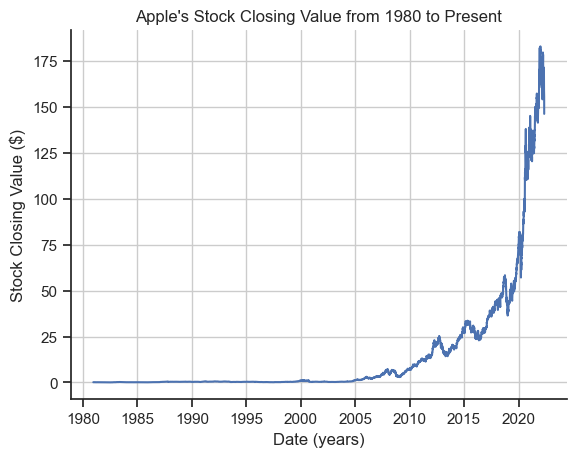

In [104]:
sns.lineplot(x='Date', y='High', data=stocks_df)
plt.title("Apple's Stock Closing Value from 1980 to Present")
plt.ylabel("Stock Closing Value ($)")
plt.xlabel("Date (years)")
plt.grid(True)
plt.show()

### Summary / Conclusion
##### This plot shows an overview of how Apple's stock value has fluctuated over time. From this plot it is evident that the iPhone has not be detrimental to Apples stock value as it has increased since the release of the first iPhone in 2007. Also, it can be argued that the iPhone is benefitical to Apple's stock value because the stock value was low until the release of the first iPhone where the stock value began to increase rapidly. Further analysis is needed to look at specific time frames to conclude which iPhones were sucesses for Apple.

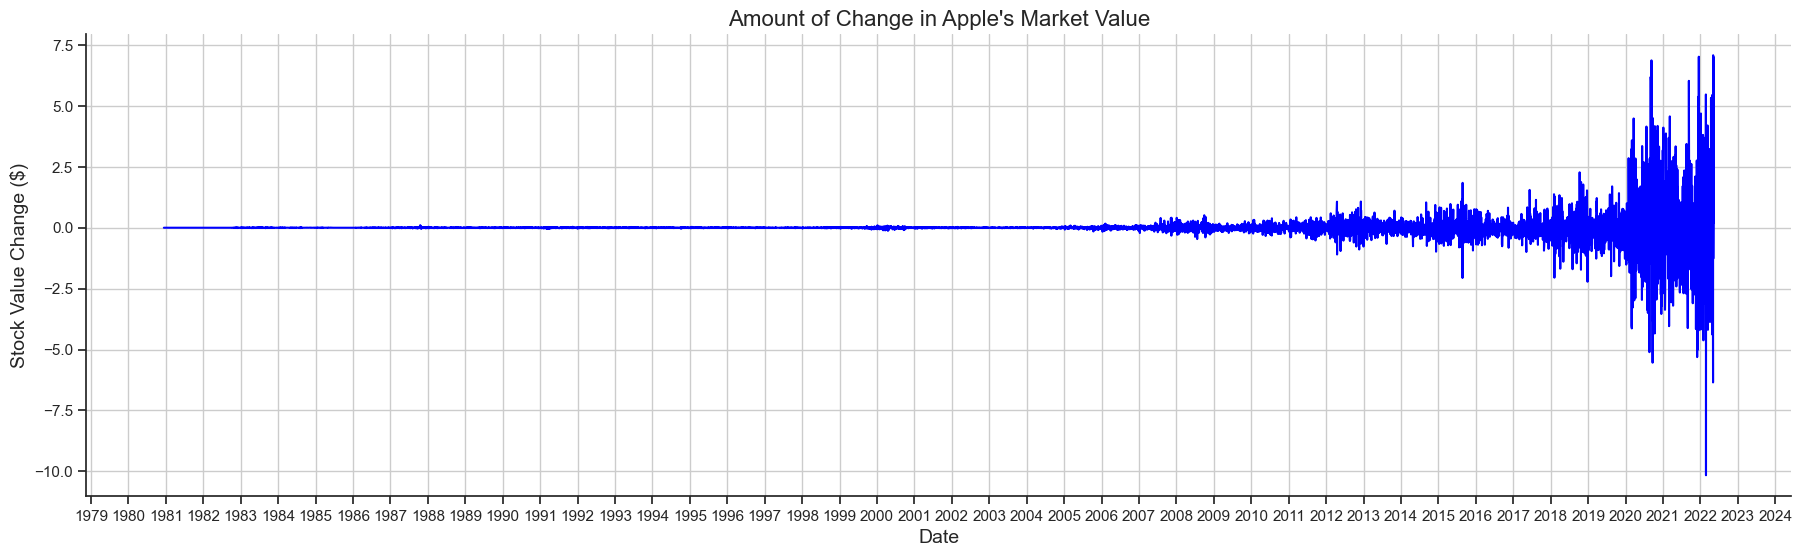

In [105]:
plt.figure(figsize=(22,6))
sns.lineplot(data=stocks_df, y=stocks_df['Change'], x=stocks_df['Date'], color='blue')
plt.title("Amount of Change in Apple's Market Value", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Stock Value Change ($)", fontsize=14)

years = YearLocator()
formatter = DateFormatter('%Y')
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(formatter)

plt.grid(True)
plt.show()

### Summary / Conclusion
##### This plot shows how much Apple's stock value has fluctuated over time. Before the release of the iPhone Apple's stock values has no noticable change, while after the release of the iPhone the stock value slowly began to change. The change has grown larger since 2007 and it now has a variance of around $17. This graph can show that iPhones are a large contributor to Apple's market value because they fit into the timeline of when Apple's stock started to become more active.

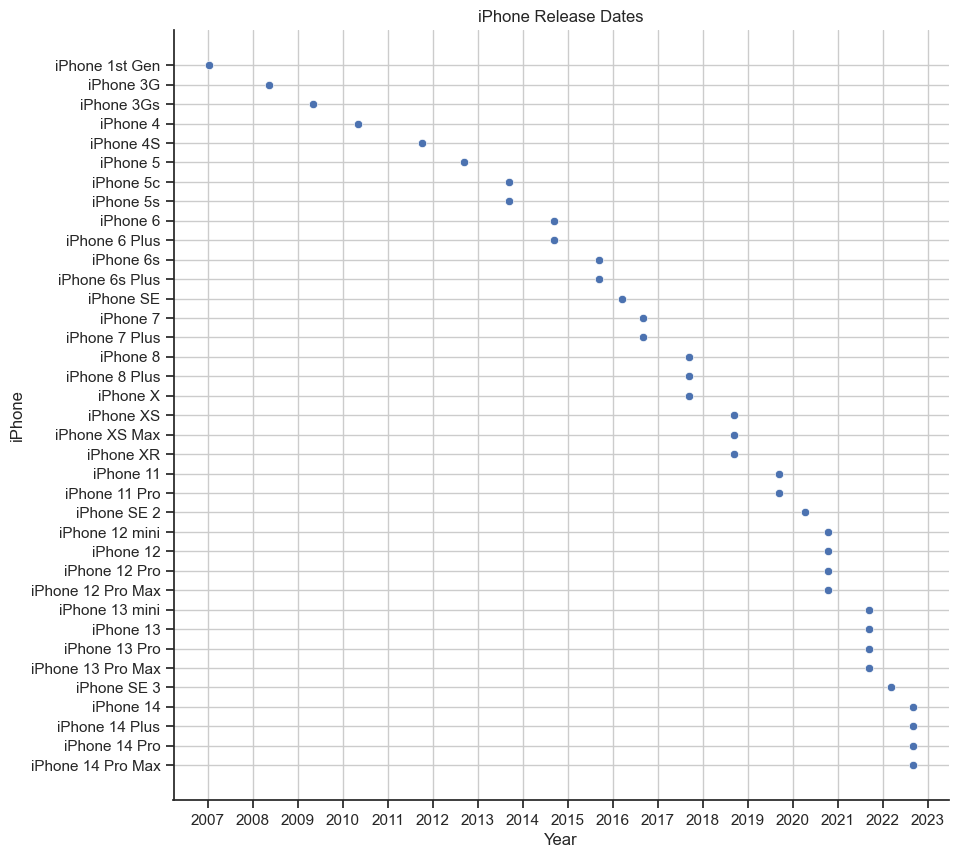

In [106]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='Release_Date', y='iPhone', data=iPhone_df)

plt.xlabel("Year")
plt.ylabel("iPhone")
plt.title("iPhone Release Dates")

years = YearLocator()
formatter = DateFormatter('%Y')
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(formatter)

plt.grid(True)
plt.show()

### Summary / Conclusion
##### This plot visually shows each iPhone and the date they were released. This plot shows that the first iPhone was released in 2007, and Apple has released a new iPhone every year since 2007. Also, as time progresses Apple started to release more than one iPhone each year, with a maximum amount of iPhones released in 2020 where 5 phones were released.

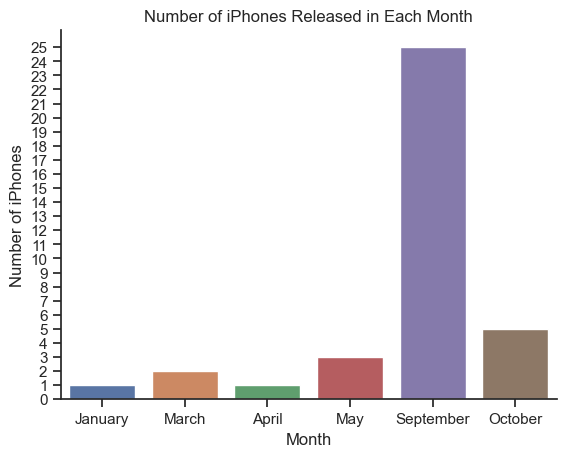

In [107]:
release_counts_month = iPhone_df.groupby(iPhone_df['Release_Date'].dt.month)['iPhone'].count()
sns.barplot(x=[calendar.month_name[i] for i in release_counts_month.index], y=release_counts_month.values)
plt.yticks(range(0, max(release_counts_month.values)+1, 1))
plt.ylabel("Number of iPhones")
plt.xlabel("Month")
plt.title("Number of iPhones Released in Each Month")
plt.show()

### Summary / Conclusion
##### This plot shows which month iPhones have been released and the quantity of each month. iPhones have only been released in January, March, April, May, September, and October. September has the most phones released with 25 iPhones being released in September.

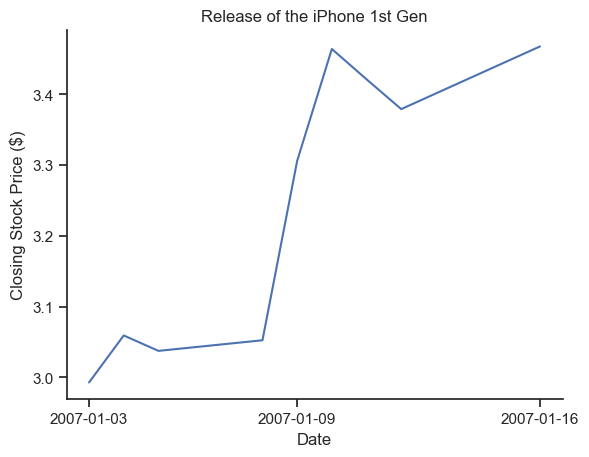

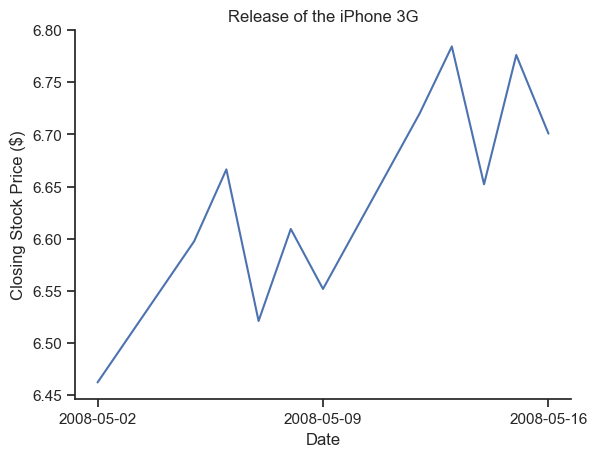

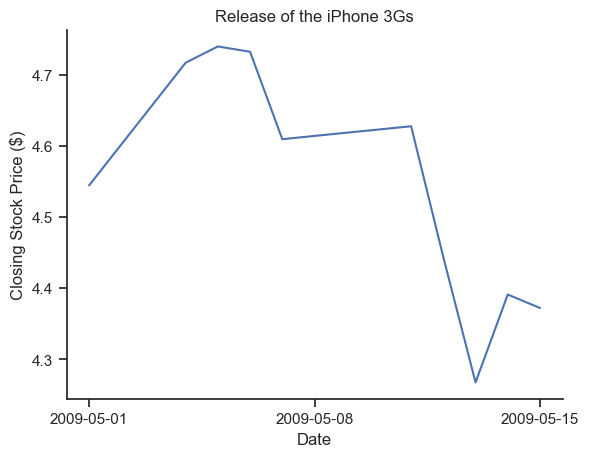

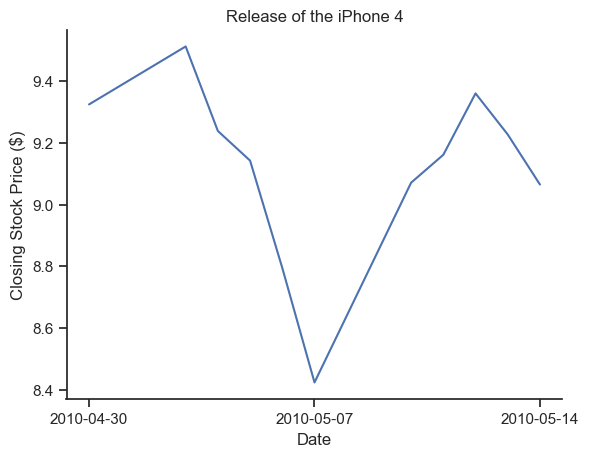

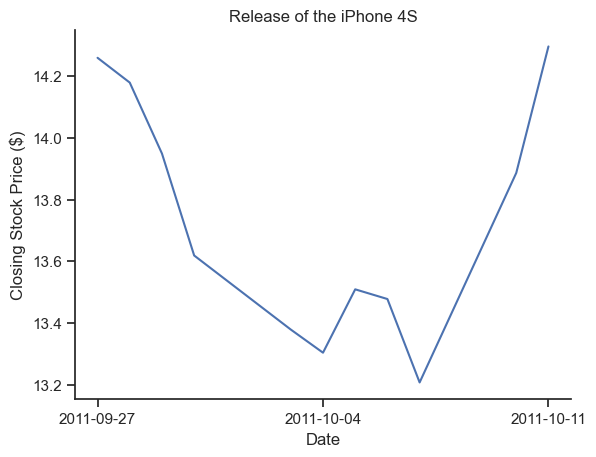

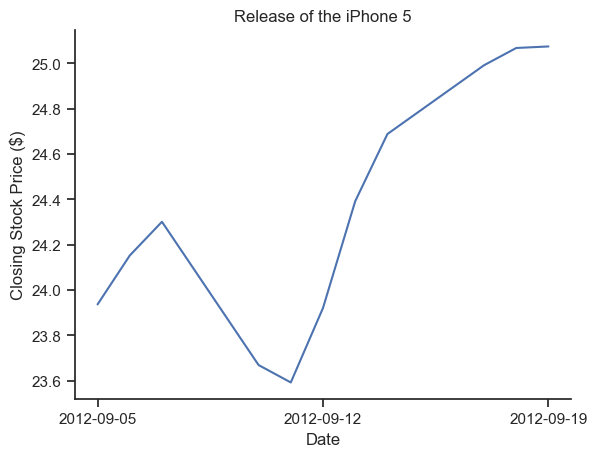

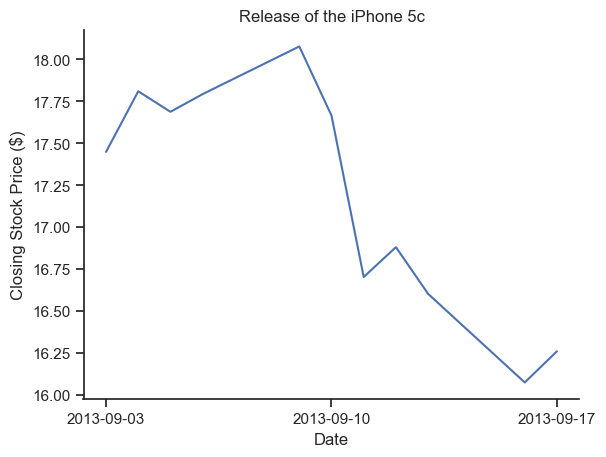

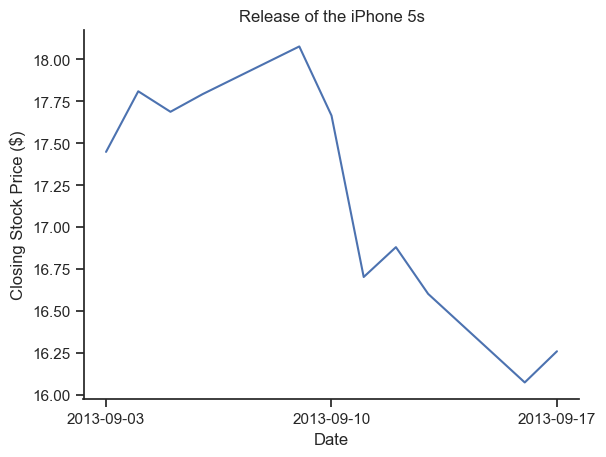

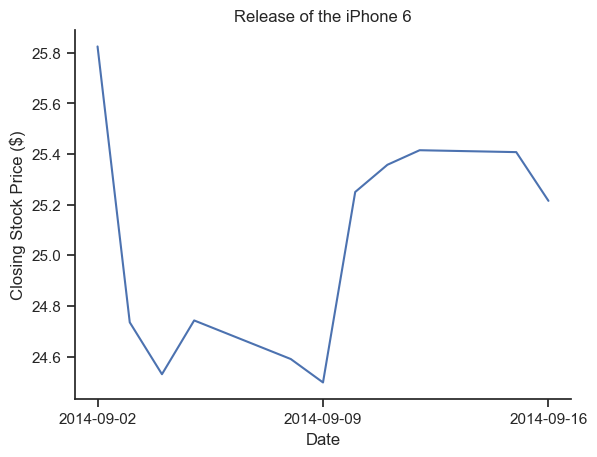

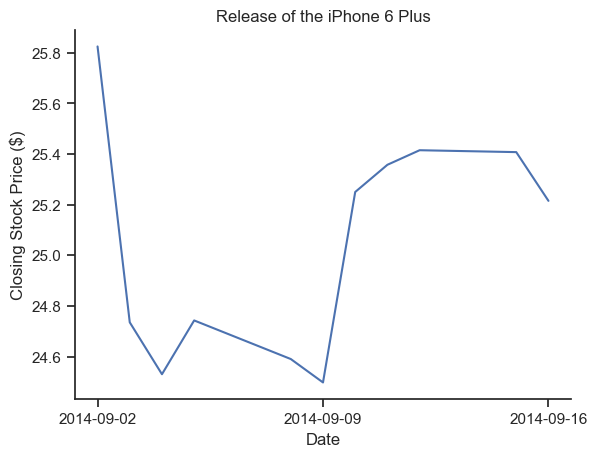

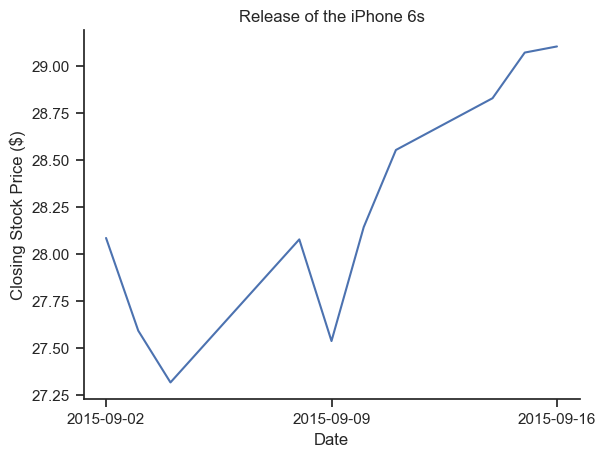

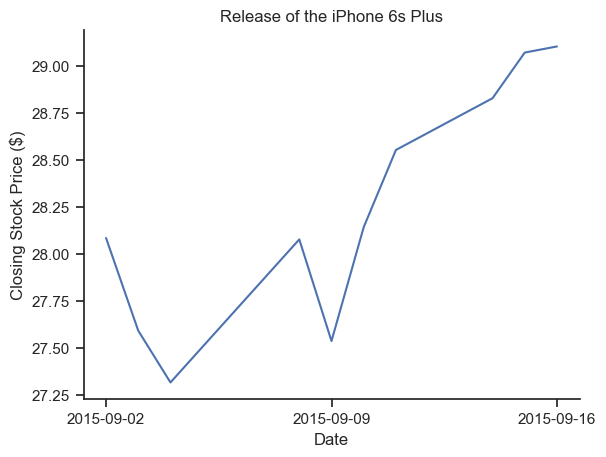

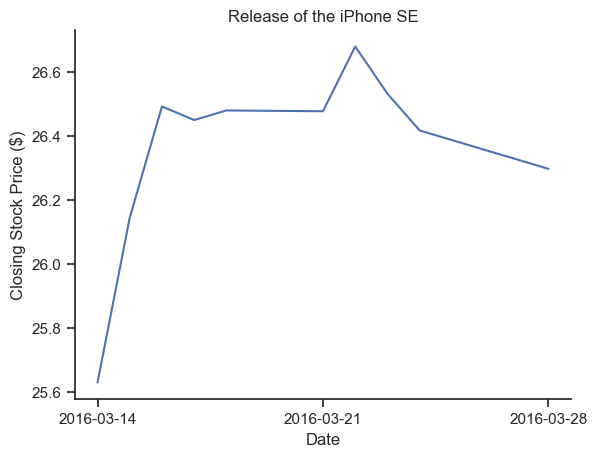

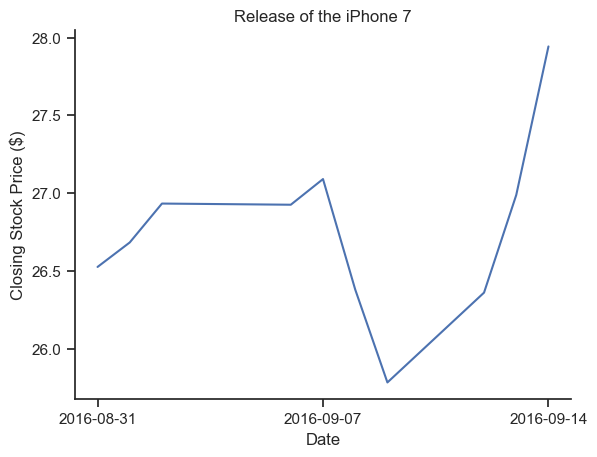

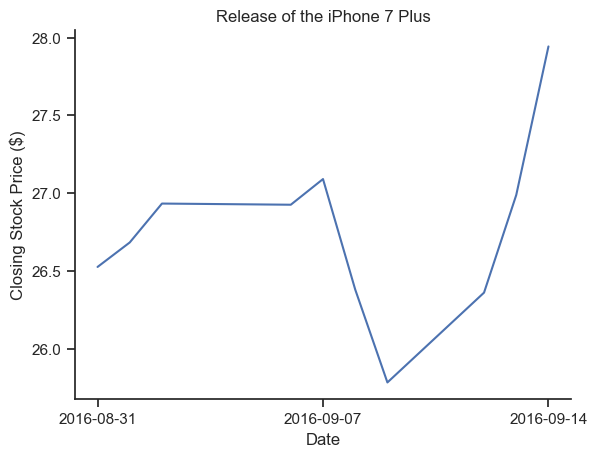

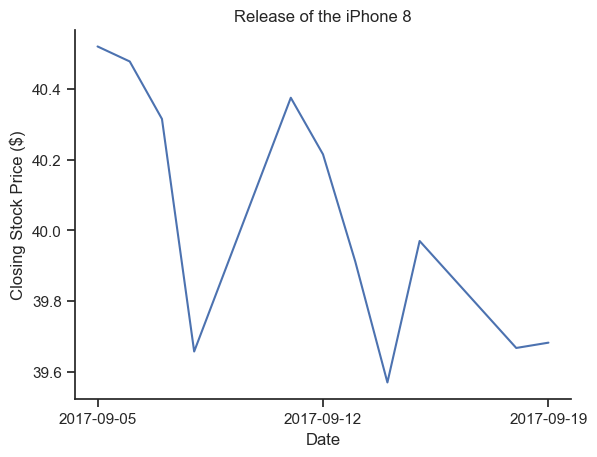

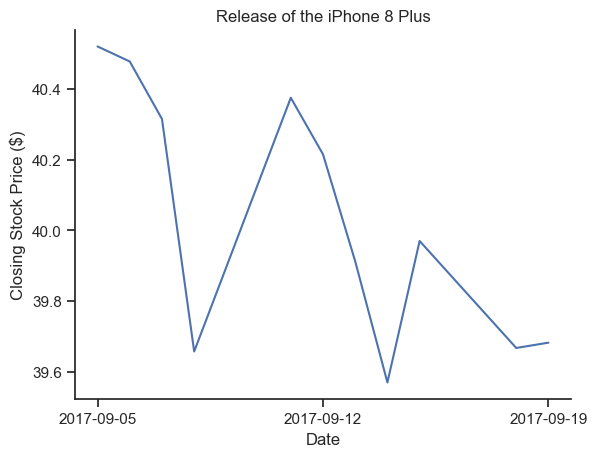

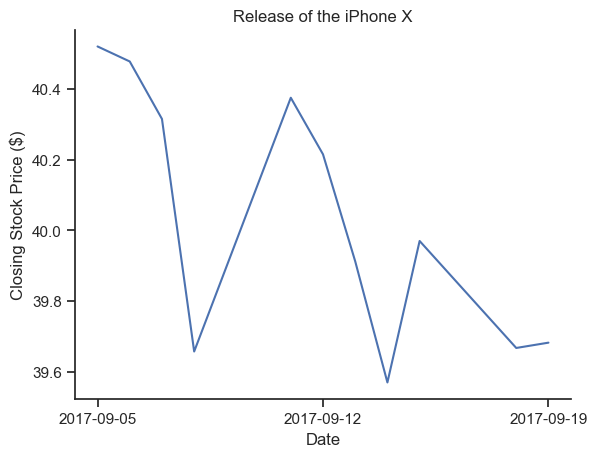

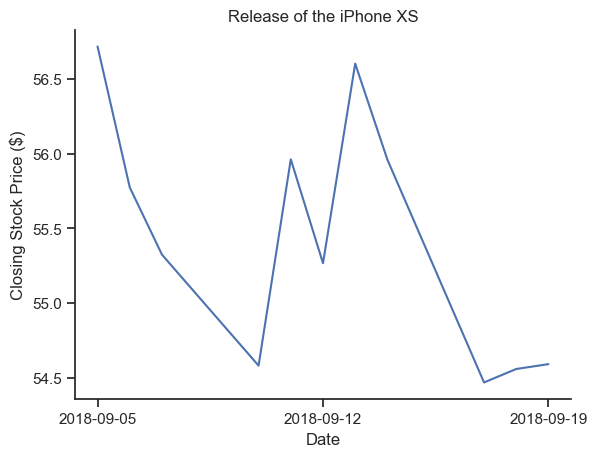

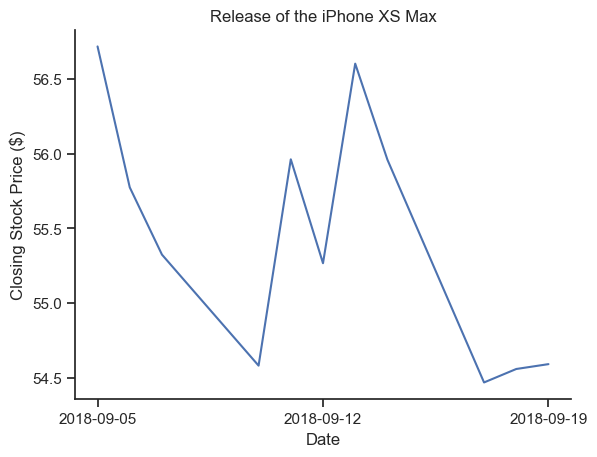

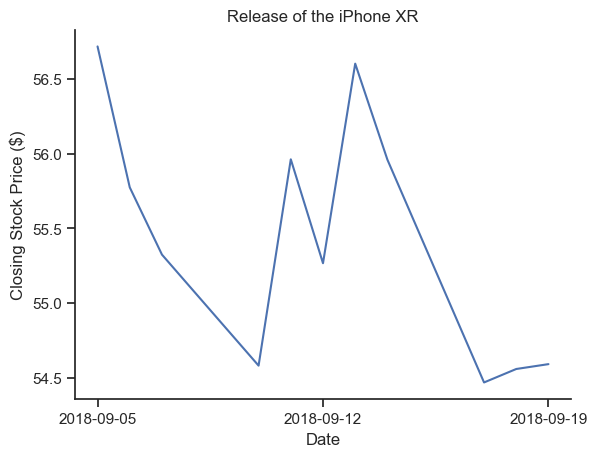

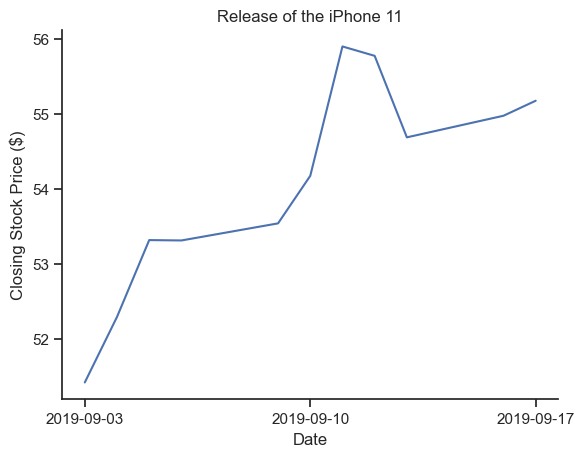

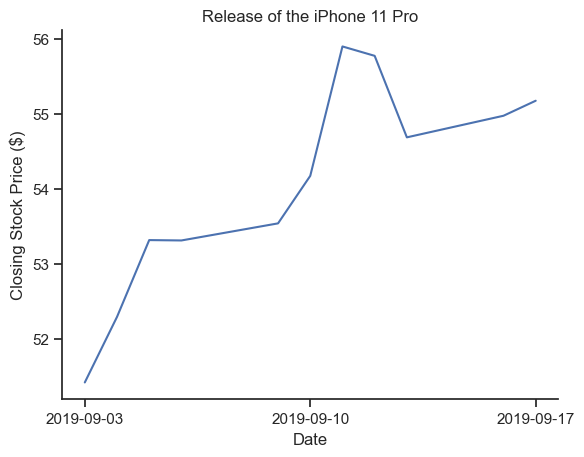

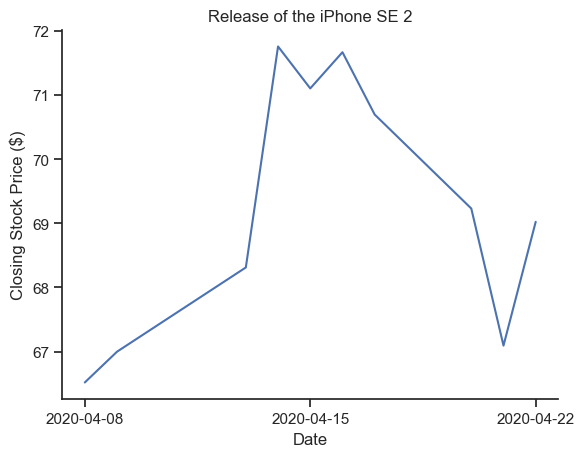

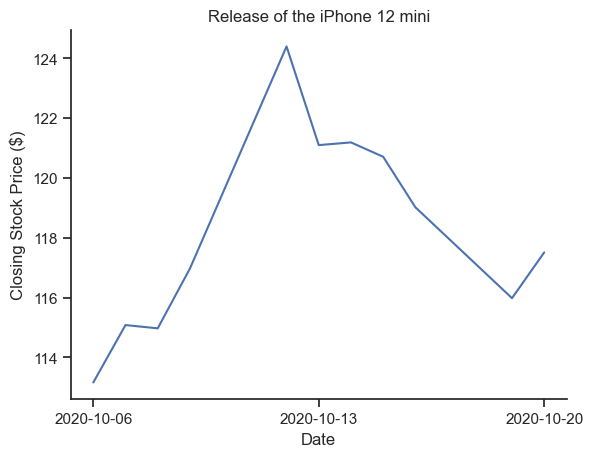

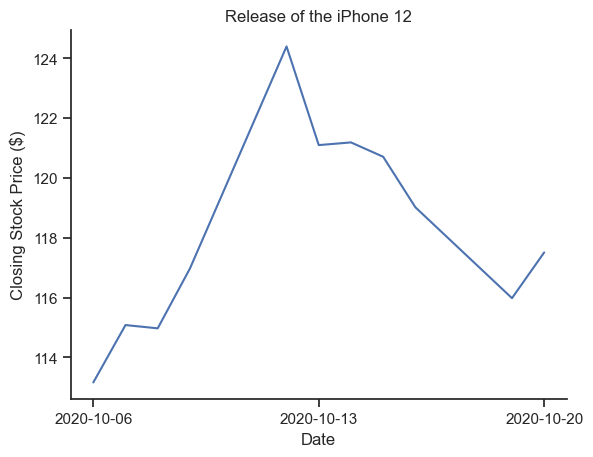

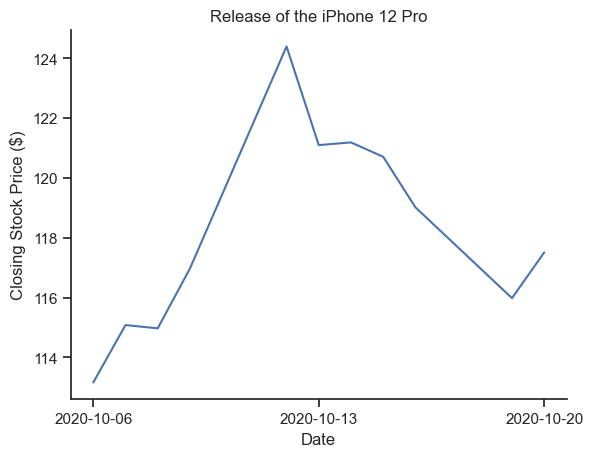

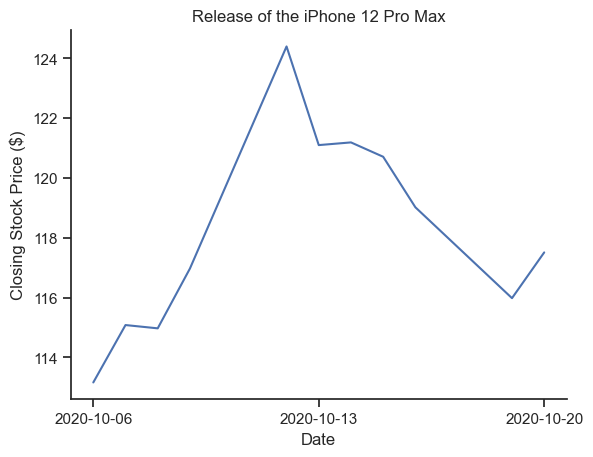

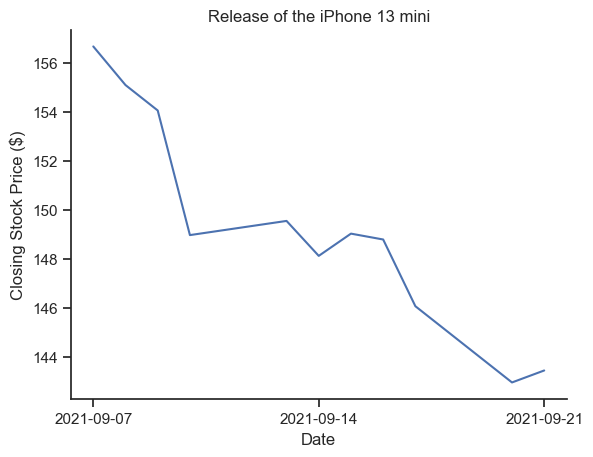

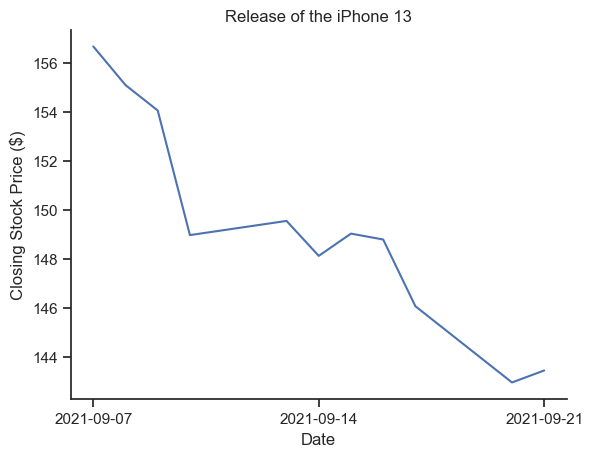

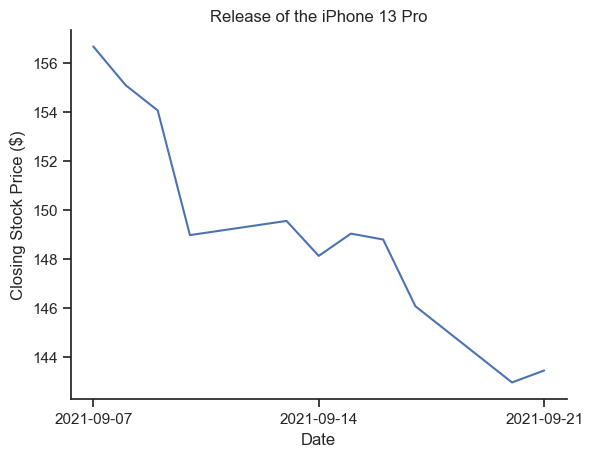

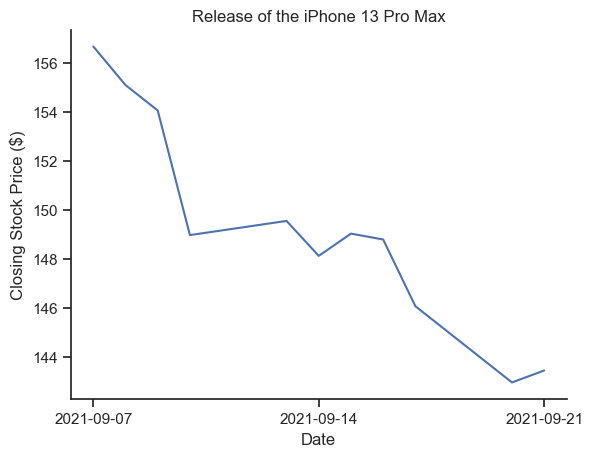

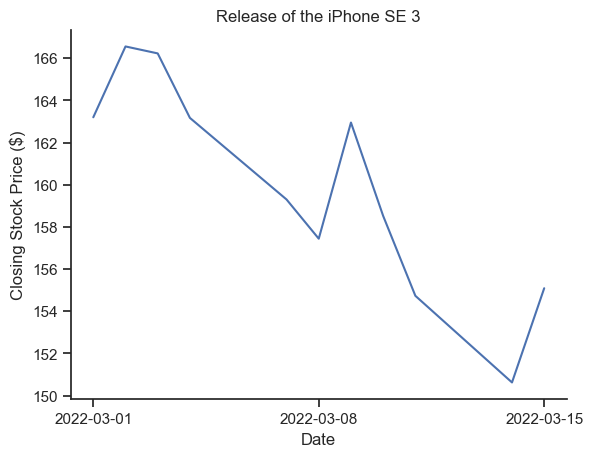

In [130]:
iPhone_order = []
for iPhone_model in merged_df['iPhone'].unique():
    iPhone_order.append(iPhone_model)

grouped_df = merged_df.groupby('iPhone')


for iPhone_model in iPhone_order:
    group = grouped_df.get_group(iPhone_model)
    for index, row in group.iterrows():
        release_date = row['Release_Date']
        one_week_before = release_date - pd.Timedelta(days=7)
        one_week_after = release_date + pd.Timedelta(days=7)
        subset_df = stocks_df[stocks_df['Date'].between(one_week_before, one_week_after)]
        sns.lineplot(data=subset_df, x='Date', y='Close')
        plt.xticks([subset_df['Date'].iloc[0], release_date, subset_df['Date'].iloc[-1]])
    plt.title(f"Release of the {iPhone_model}")
    plt.ylabel('Closing Stock Price ($)')
    plt.show()
